# Constructive and Improvement Heuristics Template

This notebook provides a template for developing and analyzing both constructive and improvement heuristics for solving combinatorial optimization problems. Students will implement both a constructive phase and a local search improvement phase, analyze their performance, and compare results across multiple instances.

## Objectives:
1. Implement a constructive heuristic for initial solution generation
2. Develop a local search procedure for solution improvement
3. Analyze the performance and improvement achieved by the local search using 15 instances from the literature
4. Compare results with best-known solutions
5. Analyze computational efficiency of both phases


[Follow the instructions in each section and provide the required content.]

# Flow Shop Scheduling Problem
Prof. María Angélica Salazar Aguilar

Selected Topics of Optimization

## Team 1

Provide the names, student IDs, and contact information of all team members below.

|Student ID      | Name  | Email             |
|----------------|------------|-------------------|
|2013939         | Aldo Sebastian Lopez Rivas | aldo.lopezrvs@uanl.edu.mx                  |
|2173850                |Josue Sebastian Cruz Cantu            |            josue.cruzcn@uanl.edu.mx       |
|2173891                |Iver Jair Salas Sanchez            |     iver.salass@uanl.edu.mx              |
|2014777                |Juan Carlos Sanchez Valencia|        juan.sanchezvln@uanl.edu.mx           |

## 1. Problem Description and Mathematical Model

**Flow Shop Scheduling Problem (FSSP)**

**Sets and data**  
- $J=\{1,\dots,n\}$ jobs, $M=\{1,\dots,m\}$ machines.  
- $p_{ij}\ge 0$: processing time of job $j$ on machine $i$.  
- A permutation (sequence) of jobs is denoted by $\pi=(\pi_1,\ldots,\pi_n)$.

**State (completion-time) recursions**  
Let $C_{i,\pi_k}$ be the completion time of job $\pi_k$ on machine $i$. Then

\begin{align}
C_{1,\pi_1} &= p_{1,\pi_1}, \\
C_{1,\pi_k} &= C_{1,\pi_{k-1}} + p_{1,\pi_k} \qquad (k=2,\ldots,n), \\
C_{i,\pi_1} &= C_{i-1,\pi_1} + p_{i,\pi_1} \qquad (i=2,\ldots,m), \\
C_{i,\pi_k} &= \max\{\, C_{i-1,\pi_k},\; C_{i,\pi_{k-1}} \,\} + p_{i,\pi_k} \qquad (i=2,\ldots,m;\; k=2,\ldots,n).
\end{align}

The **makespan** is $C_{\max} = C_{m,\pi_n}$.

**Objective**  
$$
\min_{\pi \in \mathcal{S}_n} \; C_{\max}(\pi) \;=\; C_{m,\pi_n}.
$$

where $\mathcal{S}_n$ is the set of all permutations of $n$ jobs (identical machine order for every job).

> *Note.* A full MILP can be written with binary assignment variables $x_{jk}\in\{0,1\}$ indicating job $j$ at position $k$ and time variables, but here we emphasize a constructive permutation heuristic.

---

### Pendulum Heuristic (used to construct $\pi$)

**Idea.** Select the first job based on the shortest processing time on machine 1, then sort the remaining jobs by total processing time $T_j=\sum_{i=1}^m p_{ij}$ (ascending) and place them alternately at the left and right ends of the sequence, starting from the right. This ensures the job with the smallest first-machine time begins the sequence, while the remaining jobs follow a pendulum pattern with lighter totals at the extremes and heavier totals toward the center.

**Steps**
1. Compute $T_j=\sum_{i=1}^m p_{ij}$ for all $j\in J$.
2. **Select the first job:** Choose job $j_1$ such that $p_{j_1,1} = \min_{j\in J} p_{j,1}$. In case of ties, select the job with the smallest $T_j$. Set $\pi_1 \leftarrow j_1$ and remove $j_1$ from $J$.
3. **Order remaining jobs:** Let $(j_2,\ldots,j_n)$ be the order of the remaining jobs such that $T_{j_2}\le \cdots \le T_{j_n}$. In case of ties in $T_j$, order by $p_{j,1}$ (ascending).
4. **Apply pendulum pattern:** Initialize two pointers $l\leftarrow 2$, $r\leftarrow n$. For $k=2$ to $n$:
   - if $k$ is even, set $\pi_r \leftarrow j_k$ and $r\leftarrow r-1$;
   - if $k$ is odd, set $\pi_l \leftarrow j_k$ and $l\leftarrow l+1$.

This yields a permutation $\pi$ where the first position holds the job with minimum first-machine time, and the remaining positions follow a pendulum layout with lighter jobs at the ends and heavier jobs near the center.

## 2. Pseudocode: Constructive Heuristic

```
Algorithm: Local_Search (Pendulum-Aligned)
Input: processing_times, initial_sequence
Output: improved_sequence (best found), improved_makespan

1. Set seq ← initial_sequence
2. Compute mk ← makespan(seq); precompute job_totals; identify bottleneck
3. Repeat until no further improvement:
   3.1 Score all adjacent pairs by:
       - bottleneck difference
       - total load difference
       - pendulum bias (heavy→center, light→ends)
       - neighborhood smoothness
       - bottleneck criticality bonus
   3.2 Try swaps in descending score; apply best-improving swap (delta-evaluated)
       - After applying, update mk, bottleneck, and rescore
       - Keep applying improving swaps until none remain
   3.3 If still no improvement:
       - Guided perturbation: apply top-scored swap if worsening ≤ 0.2%
       - Delta-based insertion: move a top-scored job within a small window; accept first improving move
   3.4 Focused window re-optimization:
       - Pick most critical region; run adjacent best-improvement (delta) inside a window until locally optimal
   3.5 Track and keep the global best (sequence, makespan)
4. Return best sequence and its makespan
```

[Explain the key components and decision criteria of your constructive heuristic]

## 3. Pseudocode: Local Search

[Students: Provide detailed pseudocode for your local search procedure]

### Neighborhood Structure
```
Algorithm: Local_Search (Neighborhood) Input: Current solution S Output: Neighborhood N(S)

1. Adjacent swap (primary): swap jobs at i and i+1. Deterministic priority by score:
    - Bottleneck diff, total-load diff, pendulum bias (heavy→center/light→ends), smoothness, bottleneck bonus.
2. Guided perturbation (fallback): apply top-scored adjacent swap if no improvement, allowed worsen ≤ 0.2%.
3. Delta-based insertion (bigger step): move one job i→j via adjacent delta updates within a small window; accept first improving move.
4. Focused window re-opt: after any improvement, intensify with adjacent swaps in a window around the most critical position.
5. Feasibility: all moves keep a valid permutation; flow constraints respected by makespan eval.
```

### Stopping Criteria
Algorithm: Local_Search (Stopping) Input: Initial solution S Output: Best solution S*

1. S* = S; iter = 0.
2. While iter < MaxIterations:
   - Try adjacent best-improvement (delta). If improved: update S*, continue.
   - If no improvement: guided perturbation (guarded). If still none: delta insertion.
   - After any improvement: focused window re-opt.
   - If no improvement after fallbacks: stop (converged).
   - iter += 1
3. Optional: stop on time limit or no-improvement for K outer iterations.
4. Return S*.*

In [58]:
# Core libs
import sys
from pathlib import Path
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Types
from typing import List, Tuple, Dict, Optional

# Global PT holder (used by downstream cells)
PROCESSING_TIMES: np.ndarray = None

# Instances directory (2 levels up from this notebook)
INST_DIR = Path.cwd().parents[1] / "Instances"

[Students: Describe the main functions used in the heuristic, including their purpose, inputs, and outputs] 
Add more functions as needed and explain their roles.

In [59]:
# Helper functions

# Global holder set by load_instance
PROCESSING_TIMES: np.ndarray = None  # also declared in Imports

def load_instance(file_path: str) -> np.ndarray:
    """
    Load Taillard .fsp or CSV into an (n_jobs x n_machines) float matrix.

    Robust handling:
    - Detect header as first line with >=2 integers: n_jobs, n_machs (seed/UB/LB ignored).
    - Detect 'processing times' line case/space tolerant (optional colon).
    - Try in order:
      1) Job-major: next n_jobs numeric lines, each with >= n_machs numbers.
      2) Machine-major: next n_machs numeric lines, each with >= n_jobs numbers, then transpose.
      3) Wrapped lines: aggregate numeric tokens across lines into chunks of n_machs per job.
    """
    global PROCESSING_TIMES
    import re
    from typing import List

    def ints_in_line(ln: str) -> List[int]:
        vals = []
        for tok in ln.replace(",", " ").split():
            try:
                vals.append(int(tok))
            except ValueError:
                return []
        return vals

    def numeric_tokens(ln: str) -> List[float]:
        nums = []
        for tok in ln.replace(",", " ").split():
            try:
                nums.append(float(tok))
            except ValueError:
                return []
        return nums

    try:
        # CSV
        if file_path.lower().endswith(".csv"):
            pt = pd.read_csv(file_path, header=None).values.astype(float)
            PROCESSING_TIMES = pt
            return pt

        # Read all lines (preserve blanks)
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            lines = [ln.strip() for ln in f]

        # 1) Header: first line with >=2 integers
        n_jobs = n_machs = None
        header_idx = None
        for idx, ln in enumerate(lines[:60]):
            ints = ints_in_line(ln)
            if len(ints) >= 2:
                n_jobs, n_machs = ints[0], ints[1]
                header_idx = idx
                break
        if header_idx is None:
            raise ValueError("Could not locate numeric header (line with >=2 integers).")

        # 2) 'processing times' line
        pt_line_regex = re.compile(r"^\s*processing\s+times\s*:?\s*$", re.IGNORECASE)
        pt_idx = None
        for idx in range(header_idx, len(lines)):
            if pt_line_regex.match(lines[idx]):
                pt_idx = idx + 1
                break
        if pt_idx is None:
            raise ValueError("Missing 'processing times' section.")

        # Collect subsequent numeric-only lines into blocks
        blocks: List[List[float]] = []
        for ln in lines[pt_idx:]:
            if not ln:
                continue
            nums = numeric_tokens(ln)
            if nums:
                blocks.append(nums)
            else:
                # Stop at first non-numeric after PT section (commonly next section/header)
                # but allow wrapped-mode to continue reading; we’ll break only if both job-major
                # and machine-major checks fail below.
                continue

        # Attempt A: job-major (n_jobs rows, >= n_machs cols)
        jm_ok = len(blocks) >= n_jobs and all(len(blocks[i]) >= n_machs for i in range(min(n_jobs, len(blocks))))
        if jm_ok:
            rows = [blocks[i][:n_machs] for i in range(n_jobs)]
            pt = np.asarray(rows, dtype=float)
            if pt.shape == (n_jobs, n_machs):
                PROCESSING_TIMES = pt
                return pt

        # Attempt B: machine-major (n_machs rows, >= n_jobs cols) -> transpose
        mm_ok = len(blocks) >= n_machs and all(len(blocks[i]) >= n_jobs for i in range(min(n_machs, len(blocks))))
        if mm_ok:
            rows = [blocks[i][:n_jobs] for i in range(n_machs)]
            pt = np.asarray(rows, dtype=float).T  # transpose to (n_jobs, n_machs)
            if pt.shape == (n_jobs, n_machs):
                PROCESSING_TIMES = pt
                return pt

        # Attempt C: wrapped lines — aggregate tokens per job
        rows: List[List[float]] = []
        buf: List[float] = []
        # Re-scan lines after PT to allow wrapped tokens (include numeric-only and skip others)
        i = pt_idx
        while i < len(lines) and len(rows) < n_jobs:
            ln = lines[i]
            i += 1
            if not ln:
                continue
            nums = numeric_tokens(ln)
            if not nums:
                continue
            buf.extend(nums)
            # Slice out full rows of n_machs
            while len(buf) >= n_machs and len(rows) < n_jobs:
                rows.append(buf[:n_machs])
                buf = buf[n_machs:]

        if len(rows) == n_jobs:
            pt = np.asarray(rows, dtype=float)
            if pt.shape == (n_jobs, n_machs):
                PROCESSING_TIMES = pt
                return pt

        raise ValueError(f"Unable to parse processing times as job-major, machine-major, or wrapped format. "
                         f"Collected blocks={len(blocks)}, rows={len(rows)}, expected ({n_jobs}, {n_machs}).")

    except Exception as e:
        raise ValueError(f"Failed to load instance: {e}")


def _completion_times(processing_times: np.ndarray, seq: List[int]) -> np.ndarray:
    """Compute completion time matrix for flow shop (Johnson’s recurrence)."""
    if len(seq) == 0:
        return np.zeros((0, 0))
    n, m = processing_times.shape
    C = np.zeros((len(seq), m), dtype=float)
    for i, job in enumerate(seq):
        for k in range(m):
            p = processing_times[job, k]
            if i == 0 and k == 0:
                C[i, k] = p
            elif i == 0:
                C[i, k] = C[i, k-1] + p
            elif k == 0:
                C[i, k] = C[i-1, k] + p
            else:
                C[i, k] = max(C[i-1, k], C[i, k-1]) + p
    return C

def calculate_makespan(processing_times: np.ndarray, seq: List[int]) -> float:
    """Makespan = completion time of last job on last machine."""
    if len(seq) == 0:
        return 0.0
    C = _completion_times(processing_times, seq)
    return float(C[-1, -1])

def calculate_objective(solution: List[int]) -> float:
    """Uses global PROCESSING_TIMES loaded by load_instance."""
    if PROCESSING_TIMES is None:
        raise RuntimeError("PROCESSING_TIMES is not set. Call load_instance first.")
    return calculate_makespan(PROCESSING_TIMES, solution)

def is_feasible(solution: List[int]) -> bool:
    """Valid permutation check."""
    if PROCESSING_TIMES is None:
        raise RuntimeError("PROCESSING_TIMES is not set. Call load_instance first.")
    n = PROCESSING_TIMES.shape[0]
    return isinstance(solution, list) and len(solution) == n and sorted(solution) == list(range(n))

def visualize_solution(solution: List[int], title: str = "Solution"):
    """Simple bar plot of total times in current order."""
    if PROCESSING_TIMES is None or len(solution) == 0:
        print("Nothing to visualize.")
        return
    job_totals = PROCESSING_TIMES.sum(axis=1)
    ordered = [job_totals[j] for j in solution]
    plt.figure(figsize=(10, 3))
    plt.bar(range(len(solution)), ordered, color="steelblue")
    plt.title(title)
    plt.xlabel("Position in sequence")
    plt.ylabel("Total job time")
    plt.tight_layout()
    plt.show()

In [60]:
# Constructive Heuristic Implementation (numpy-safe, exact logic)

from typing import List, Tuple

def calculate_total_processing_time(processing_times: List[List[float]] | np.ndarray, job_idx: int) -> float:
    return float(np.sum(processing_times[job_idx]))

def pendulum_heuristic(processing_times: List[List[float]] | np.ndarray) -> List[int]:
    # numpy-safe emptiness check
    if processing_times is None:
        return []
    num_jobs = len(processing_times)
    num_machines = processing_times.shape[1] if num_jobs > 0 else 0

    # Precompute totals and machine-1 times for tie-breaking
    totals = [calculate_total_processing_time(processing_times, i) for i in range(num_jobs)]
    m1_times = [float(processing_times[i][0]) if num_machines > 0 else 0.0 for i in range(num_jobs)]

    # Step A: choose first job (min machine-1 time; tie-break by total, then job index)
    first_job = min(range(num_jobs), key=lambda j: (m1_times[j], totals[j], j))

    # Step B: place the first job at position 0
    sequence = [-1] * num_jobs
    sequence[0] = first_job

    # Step C: sort remaining jobs by (total asc, machine1 asc, job index asc)
    remaining = [j for j in range(num_jobs) if j != first_job]
    remaining.sort(key=lambda j: (totals[j], m1_times[j], j))

    # Step D: pendulum fill for the rest, starting from right then left and alternating
    left = 1
    right = num_jobs - 1
    for k, job_idx in enumerate(remaining):
        if k % 2 == 0:
            sequence[right] = job_idx
            right -= 1
        else:
            sequence[left] = job_idx
            left += 1

    return sequence

def constructive_heuristic(processing_times: np.ndarray) -> Tuple[List[int], float, float]:
    t0 = time.perf_counter()
    seq = pendulum_heuristic(processing_times)
    obj = calculate_makespan(processing_times, seq)
    return seq, obj, time.perf_counter() - t0

In [61]:
# Local Search Implementation (numpy-safe, exact project logic)

from typing import List, Tuple, Optional

def identify_bottleneck_machine(processing_times) -> int:
    # numpy-safe emptiness check
    if processing_times is None:
        return 0
    if hasattr(processing_times, "size"):
        if processing_times.size == 0:
            return 0
        # sum per machine (axis=0): shape (m,)
        machine_totals = np.sum(processing_times, axis=0)
        return int(np.argmax(machine_totals))
    else:
        if not processing_times or not processing_times[0]:
            return 0
        machine_totals = [sum(machine_times) for machine_times in zip(*processing_times)]
        return machine_totals.index(max(machine_totals))

def calculate_total_processing_time(processing_times, job_idx: int) -> float:
    # same helper used by heuristic; numpy-safe
    return float(np.sum(processing_times[job_idx]))

def score_adjacent_pair(sequence: List[int], pos: int,
                        processing_times,
                        bottleneck_machine: int,
                        job_totals: List[float],
                        n: int,
                        bn_proc: List[float],
                        bn_threshold: float) -> float:
    job1, job2 = sequence[pos], sequence[pos + 1]
    bottleneck_diff = abs(float(processing_times[job1][bottleneck_machine]) - float(processing_times[job2][bottleneck_machine]))
    total_diff = abs(job_totals[job1] - job_totals[job2])

    center = (n - 1) / 2.0
    if job_totals[j1 := job1] >= job_totals[j2 := job2]:
        heavy_pos_before, light_pos_before = pos, pos + 1
    else:
        heavy_pos_before, light_pos_before = pos + 1, pos
    heavy_pos_after = pos if heavy_pos_before == pos + 1 else pos + 1
    light_pos_after = pos if light_pos_before == pos + 1 else pos + 1

    dist_heavy_c_before = abs(heavy_pos_before - center)
    dist_heavy_c_after = abs(heavy_pos_after - center)
    end_dist_light_before = min(light_pos_before, (n - 1) - light_pos_before)
    end_dist_light_after = min(light_pos_after, (n - 1) - light_pos_after)

    centrality_gain = max(0.0, dist_heavy_c_before - dist_heavy_c_after)
    end_bias_gain = max(0.0, end_dist_light_after - end_dist_light_before)
    alpha, beta = 9.0, 4.0
    pendulum_bias = alpha * centrality_gain + beta * end_bias_gain

    idxs_before = []
    for k in (pos-1, pos, pos+1):
        if 0 <= k < n-1:
            a, b = sequence[k], sequence[k+1]
            idxs_before.append(abs(job_totals[a] - job_totals[b]))
    rough_before = sum(idxs_before)

    tmp_seq = sequence
    a1, a2 = tmp_seq[pos], tmp_seq[pos+1]
    swapped_pair = (a2, a1)
    def after(k: int) -> int:
        if k == pos:
            return swapped_pair[0]
        if k == pos+1:
            return swapped_pair[1]
        return tmp_seq[k]
    idxs_after = []
    for k in (pos-1, pos, pos+1):
        if 0 <= k < n-1:
            x, y = after(k), after(k+1)
            idxs_after.append(abs(job_totals[x] - job_totals[y]))
    rough_after = sum(idxs_after)
    smooth_gain = max(0.0, rough_before - rough_after)
    gamma = 1.5

    bonus = 0.0
    if bn_proc[job1] >= bn_threshold or bn_proc[job2] >= bn_threshold:
        bonus = 5.0

    return bottleneck_diff + total_diff + pendulum_bias + gamma * smooth_gain + bonus

def swap_adjacent(sequence: List[int], pos: int) -> List[int]:
    if pos < 0 or pos >= len(sequence) - 1:
        raise ValueError(f"Invalid swap position {pos} for sequence of length {len(sequence)}")
    new_sequence = sequence.copy()
    new_sequence[pos], new_sequence[pos + 1] = new_sequence[pos + 1], new_sequence[pos]
    return new_sequence

def evaluate_insertion_delta(processing_times,
                             sequence: List[int],
                             from_pos: int,
                             to_pos: int,
                             completion_times) -> Tuple[List[int], float, np.ndarray]:
    """
    Move job at from_pos to to_pos via adjacent micro-swaps, using
    calculate_makespan_delta at each step. Keeps completion_times as np.ndarray.
    """
    n = len(sequence)
    if from_pos == to_pos or n <= 1:
        # Ensure ct is ndarray
        if completion_times is None:
            ct = np.zeros((0, 0), dtype=float)
        else:
            ct = completion_times if isinstance(completion_times, np.ndarray) else np.asarray(completion_times, dtype=float)
        cur_mk = ct[-1, -1] if ct.size else calculate_makespan(processing_times, sequence)
        return sequence.copy(), cur_mk, ct

    # Ensure ndarray for ct
    ct = completion_times if isinstance(completion_times, np.ndarray) else np.asarray(completion_times, dtype=float)
    seq = sequence.copy()
    current_mk = ct[-1, -1] if ct.size else calculate_makespan(processing_times, seq)

    step = 1 if to_pos > from_pos else -1
    pos = from_pos
    while pos != to_pos:
        swap_pos = pos if step == 1 else pos - 1
        new_mk, new_ct = calculate_makespan_delta(processing_times, seq, swap_pos, ct)
        # Apply the swap deterministically
        seq[swap_pos], seq[swap_pos + 1] = seq[swap_pos + 1], seq[swap_pos]
        ct = new_ct
        current_mk = new_mk
        pos += step

    return seq, current_mk, ct

def local_search_main(initial_sequence: List[int],
                      processing_times,
                      max_iterations: int = 400,
                      top_k: Optional[int] = None,
                      verbose: bool = False,
                      search_mode: str = "best",
                      recompute_bottleneck: bool = True,
                      time_budget_seconds: Optional[float] = 30.0) -> Tuple[List[int], float, int]:
    # numpy-safe emptiness checks
    if initial_sequence is None or processing_times is None:
        return initial_sequence, 0.0, 0
    if len(initial_sequence) == 0:
        return initial_sequence, 0.0, 0
    if hasattr(processing_times, "size") and processing_times.size == 0:
        return initial_sequence, 0.0, 0

    num_jobs = processing_times.shape[0] if hasattr(processing_times, "shape") else len(processing_times)
    if len(initial_sequence) != num_jobs:
        raise ValueError("Sequence length must match number of jobs")
    if num_jobs <= 1:
        return initial_sequence, calculate_makespan(processing_times, initial_sequence), 0

    current_sequence = initial_sequence.copy()
    current_makespan = calculate_makespan(processing_times, current_sequence)
    best_sequence = current_sequence.copy()
    best_makespan = current_makespan

    completion_times = calculate_completion_times(processing_times, current_sequence)
    bottleneck_machine = identify_bottleneck_machine(processing_times)

    job_totals = [calculate_total_processing_time(processing_times, j) for j in range(num_jobs)]

    bn_proc = [float(processing_times[j][bottleneck_machine]) for j in range(num_jobs)]
    sorted_bn = sorted(bn_proc)
    q_index = max(0, min(len(sorted_bn) - 1, int(0.8 * (len(sorted_bn) - 1))))
    bn_threshold = sorted_bn[q_index]

    if top_k is None:
        top_k = len(current_sequence) - 1
    else:
        top_k = min(top_k, len(current_sequence) - 1)

    iterations_used = 0
    start_time = time.perf_counter()
    no_improvement_streak = 0

    while iterations_used < max_iterations:
        if time_budget_seconds is not None and (time.perf_counter() - start_time) >= time_budget_seconds:
            break
        improvement_found = False
        iterations_used += 1

        scores = []
        for pos in range(len(current_sequence) - 1):
            score = score_adjacent_pair(current_sequence, pos, processing_times, bottleneck_machine, job_totals, len(current_sequence), bn_proc, bn_threshold)
            scores.append((pos, score))
        scores.sort(key=lambda x: (-x[1], x[0]))
        top_pairs = [pos for pos, _ in scores[:top_k]]

        while True:
            if time_budget_seconds is not None and (time.perf_counter() - start_time) >= time_budget_seconds:
                break
            best_pos = None
            best_new_makespan = current_makespan
            best_new_ct = None
            if search_mode == "first":
                for pos in top_pairs:
                    new_mk, new_ct = calculate_makespan_delta(processing_times, current_sequence, pos, completion_times)
                    if new_mk < current_makespan:
                        best_pos = pos; best_new_makespan = new_mk; best_new_ct = new_ct
                        break
            else:
                for pos in top_pairs:
                    new_mk, new_ct = calculate_makespan_delta(processing_times, current_sequence, pos, completion_times)
                    if new_mk < best_new_makespan:
                        best_new_makespan = new_mk; best_pos = pos; best_new_ct = new_ct
            if best_pos is not None and best_new_makespan < current_makespan:
                current_sequence = swap_adjacent(current_sequence, best_pos)
                current_makespan = best_new_makespan
                if current_makespan < best_makespan:
                    best_makespan = current_makespan
                    best_sequence = current_sequence.copy()
                completion_times = best_new_ct if best_new_ct is not None else calculate_completion_times(processing_times, current_sequence)
                improvement_found = True
                if recompute_bottleneck:
                    bottleneck_machine = identify_bottleneck_machine(processing_times)
                    bn_proc = [float(processing_times[j][bottleneck_machine]) for j in range(num_jobs)]
                    sorted_bn = sorted(bn_proc)
                    q_index = max(0, min(len(sorted_bn) - 1, int(0.8 * (len(sorted_bn) - 1))))
                    bn_threshold = sorted_bn[q_index]
                scores = []
                for pos in range(len(current_sequence) - 1):
                    score = score_adjacent_pair(current_sequence, pos, processing_times, bottleneck_machine, job_totals, len(current_sequence), bn_proc, bn_threshold)
                    scores.append((pos, score))
                scores.sort(key=lambda x: (-x[1], x[0]))
                top_pairs = [pos for pos, _ in scores[:top_k]]
                continue
            break

        if not improvement_found:
            no_improvement_streak += 1
            if no_improvement_streak >= 2:
                best_pos = scores[0][0] if scores else None
                if best_pos is not None:
                    pert_mk, pert_ct = calculate_makespan_delta(processing_times, current_sequence, best_pos, completion_times)
                    max_worsen = 0.002 * current_makespan
                    if pert_mk <= current_makespan + max_worsen:
                        current_sequence = swap_adjacent(current_sequence, best_pos)
                        current_makespan = pert_mk
                        completion_times = pert_ct
                        no_improvement_streak = 0
                        if current_makespan < best_makespan:
                            best_makespan = current_makespan
                            best_sequence = current_sequence.copy()
                else:
                    break
        else:
            no_improvement_streak = 0

        if not improvement_found and no_improvement_streak >= 2:
            insertion_improvement = False
            n = len(current_sequence)
            candidate_positions = top_pairs[:min(10, len(top_pairs))]
            W = 14
            for pos in candidate_positions:
                left = max(0, pos - W)
                right = min(n - 1, pos + W)
                for insert_pos in list(range(left, pos)) + list(range(pos + 1, right + 1)):
                    new_seq, new_mk, new_ct = evaluate_insertion_delta(processing_times, current_sequence, pos, insert_pos, completion_times)
                    if new_mk < current_makespan:
                        current_sequence = new_seq
                        current_makespan = new_mk
                        completion_times = new_ct
                        if current_makespan < best_makespan:
                            best_makespan = current_makespan
                            best_sequence = current_sequence.copy()
                        insertion_improvement = True
                        break
                if insertion_improvement:
                    break
            if insertion_improvement:
                improvement_found = True
                no_improvement_streak = 0

        if improvement_found:
            scores = []
            for pos in range(len(current_sequence) - 1):
                score = score_adjacent_pair(current_sequence, pos, processing_times, bottleneck_machine, job_totals, len(current_sequence), bn_proc, bn_threshold)
                scores.append((pos, score))
            scores.sort(key=lambda x: (-x[1], x[0]))
            focus_pos = scores[0][0]
            n = len(current_sequence)
            W = 18
            L = max(0, focus_pos - W)
            R = min(n - 2, focus_pos + W)
            while True:
                improved_window = False
                for pos in range(L, R + 1):
                    new_mk, new_ct = calculate_makespan_delta(processing_times, current_sequence, pos, completion_times)
                    if new_mk < current_makespan:
                        current_sequence = swap_adjacent(current_sequence, pos)
                        current_makespan = new_mk
                        completion_times = new_ct
                        improved_window = True
                        if current_makespan < best_makespan:
                            best_makespan = current_makespan
                            best_sequence = current_sequence.copy()
                        if recompute_bottleneck:
                            bottleneck_machine = identify_bottleneck_machine(processing_times)
                if not improved_window:
                    break

    return best_sequence, best_makespan, iterations_used

def local_search(initial_solution: List[int], max_iterations: int = 1000, max_time: Optional[float] = None) -> Tuple[List[int], float, float]:
    t0 = time.perf_counter()
    final_seq, final_obj, _iters = local_search_main(
        initial_sequence=initial_solution,
        processing_times=PROCESSING_TIMES,
        max_iterations=max_iterations,
        top_k=None,
        search_mode="best",
        recompute_bottleneck=True,
        time_budget_seconds=max_time,
        verbose=False,
    )
    elapsed = time.perf_counter() - t0
    return final_seq, final_obj, float(elapsed)

In [ ]:
# Main execution and testing

from typing import Dict

def solve_instance(instance_path: str, best_known: float = None) -> Dict:
    """
    Solve a single instance and collect performance metrics.
    Uses:
      - load_instance (sets PROCESSING_TIMES)
      - constructive_heuristic(processing_times)
      - local_search(initial_solution, ...)
    """
    # Load instance (sets PROCESSING_TIMES global used by local_search)
    pt = load_instance(instance_path)

    # Constructive heuristic
    initial_solution, initial_objective, construction_time = constructive_heuristic(pt)

    # Local search (best-improvement, delta, insertion, windowed re-opt)
    final_solution, final_objective, improvement_time = local_search(
        initial_solution,
        max_iterations=1000,
        max_time=None  # no time cap, as requested
    )

    # Metrics
    improvement_percentage = 0.0
    if initial_objective > 0:
        improvement_percentage = ((initial_objective - final_objective) / initial_objective) * 100.0

    gap_to_best = None
    if best_known:
        gap_to_best = ((final_objective - best_known) / best_known) * 100.0

    return {
        'instance': instance_path,
        'initial_objective': float(initial_objective),
        'final_objective': float(final_objective),
        'construction_time': float(construction_time),
        'improvement_time': float(improvement_time),
        'improvement_percentage': float(improvement_percentage),
        'gap_to_best': (float(gap_to_best) if gap_to_best is not None else None),
    }


# Instances (folder is two levels up from this notebook)
instances = [
    (str(INST_DIR / 'tai20_10_0.fsp'), 1582),
    (str(INST_DIR / 'tai20_10_1.fsp'), 1659),
    (str(INST_DIR / 'tai20_10_2.fsp'), 1496),
    (str(INST_DIR / 'tai20_20_0.fsp'), 2297),
    (str(INST_DIR / 'tai20_20_1.fsp'), 2100),
    (str(INST_DIR / 'tai20_20_2.fsp'), 2326),
    (str(INST_DIR / 'tai50_10_0.fsp'), 3025),
    (str(INST_DIR / 'tai50_10_1.fsp'), 2892),
    (str(INST_DIR / 'tai50_10_2.fsp'), 2864),
    (str(INST_DIR / 'tai100_10_0.fsp'), 5770),
]

# Run experiments
results = []
for instance_path, best_known in instances:
    res = solve_instance(instance_path, best_known)
    results.append(res)

# Results table
results_df = pd.DataFrame(results)
results_df['instance_name'] = results_df['instance'].apply(lambda p: Path(p).name)
cols = [
    'instance_name',
    'initial_objective',
    'final_objective',
    'improvement_percentage',
    'gap_to_best',
    'construction_time',
    'improvement_time',
]
results_df = results_df[cols].copy()

# Round numeric columns
results_df['improvement_percentage'] = results_df['improvement_percentage'].round(3)
results_df['gap_to_best'] = results_df['gap_to_best'].round(3)
results_df['construction_time'] = results_df['construction_time'].round(6)
results_df['improvement_time'] = results_df['improvement_time'].round(6)

# Optional: sort by instance name
results_df = results_df.sort_values('instance_name', kind='stable').reset_index(drop=True)

results_df

,instance_name,initial_objective,final_objective,improvement_percentage,gap_to_best,construction_time,improvement_time
0,tai20_10_0.fsp,1936.0,1683.0,13.068,6.384,0.00046,35.399276
1,tai20_10_1.fsp,2122.0,1780.0,16.117,7.294,0.00014,38.728184


## Computational Results and Analysis
Provide the url where you downloaded the  tested instances and mention the main characteristics of the ones you tested.

Include a table summarizing the results of at least 15 different tested instances. Discuss the performance and findings below.

| Instance | Objective CH | Objective CH+LS | Imp (%) | Objective (Optimal) | Gap (%) |
|----------|--------------|----------------|----------|-------------------|----------|
|          |             |                |          |                   |          |
|          |             |                |          |                   |          |


| Instance | Time CH (s) | Time LS (s) |
|----------|--------------|----------------
|          |             |                |
|          |             |                |


Where CH refers to the constructive heuristic and LS refers to the local search.

### Performance Metrics
[Student: Analyze the following metrics across all instances]
1. Solution Quality:
   - Initial solution values vs. improved solution values
   - Percentage improvement achieved by local search
   - Gap to best-known solutions

2. Computational Efficiency:
   - Construction phase time
   - Improvement phase time
   - Total execution time

3. Statistical Analysis:
   - Average improvement percentage
   - Average gap to best-known solutions
   - Standard deviation of improvements
   - Time distribution between construction and improvement

### Visualization and Discussion
[Student: Create visualizations to support your analysis]
- Bar charts comparing initial vs. improved solutions
- Box plots of improvement percentages
- Scatter plots of solution quality vs. time
- Time distribution plots

### Conclusions
[Student: Discuss your findings]
- Effectiveness of the constructive heuristic
- Impact of the local search procedure
- Trade-offs between solution quality and computational time
- Suggestions for potential improvements

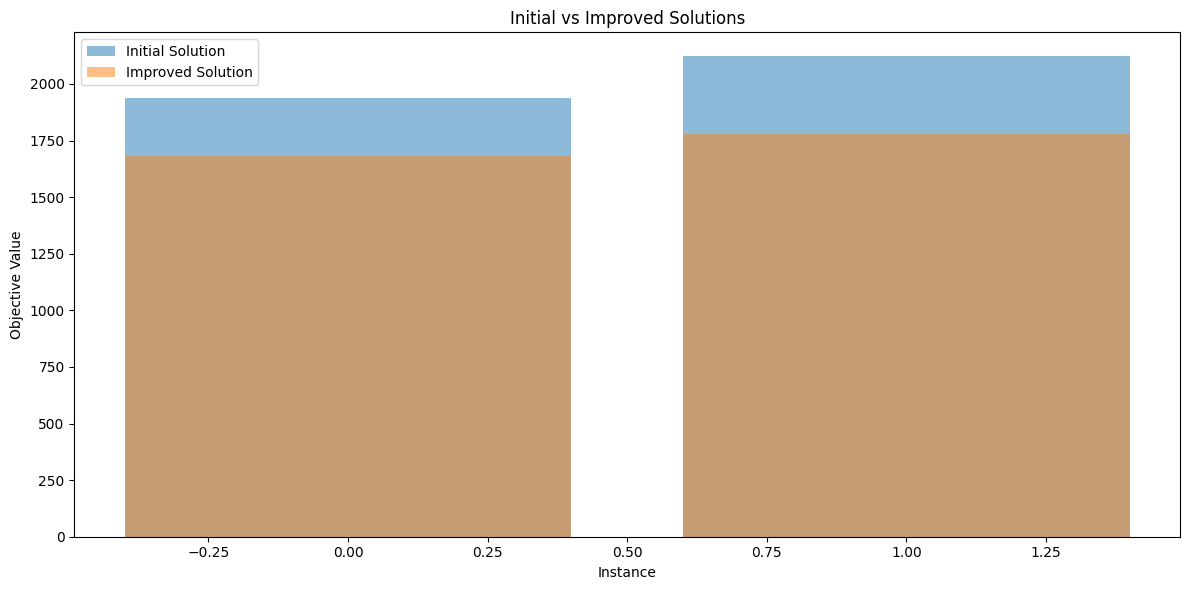

C:\Users\ASlop\AppData\Local\Temp\ipykernel_8920\1336746028.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results_df['construction_time'], results_df['improvement_time']],


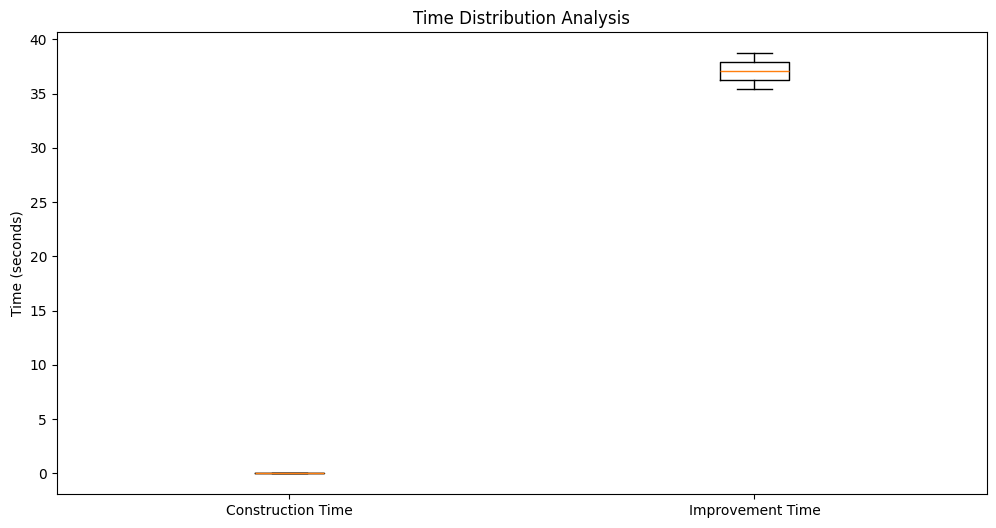


Summary Statistics:
avg_improvement: 14.59
std_improvement: 2.16
avg_gap: 6.84
avg_construction_time: 0.00
avg_improvement_time: 37.06


In [63]:
# Analysis and Visualization of Results

# Calculate summary statistics
summary_stats = {
    'avg_improvement': results_df['improvement_percentage'].mean(),
    'std_improvement': results_df['improvement_percentage'].std(),
    'avg_gap': results_df['gap_to_best'].mean(),
    'avg_construction_time': results_df['construction_time'].mean(),
    'avg_improvement_time': results_df['improvement_time'].mean()
}

# Plotting functions
def plot_solution_comparison():
    """
    Plot initial vs improved solutions for each instance
    """
    plt.figure(figsize=(12, 6))
    x = range(len(results_df))
    plt.bar(x, results_df['initial_objective'], alpha=0.5, label='Initial Solution')
    plt.bar(x, results_df['final_objective'], alpha=0.5, label='Improved Solution')
    plt.xlabel('Instance')
    plt.ylabel('Objective Value')
    plt.title('Initial vs Improved Solutions')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_time_distribution():
    """
    Plot time distribution between construction and improvement
    """
    plt.figure(figsize=(12, 6))
    plt.boxplot([results_df['construction_time'], results_df['improvement_time']], 
                labels=['Construction Time', 'Improvement Time'])
    plt.ylabel('Time (seconds)')
    plt.title('Time Distribution Analysis')
    plt.show()

# Generate plots
plot_solution_comparison()
plot_time_distribution()

# Display summary statistics
print("\nSummary Statistics:")
for metric, value in summary_stats.items():
    print(f"{metric}: {value:.2f}")

# [Student: Add additional analysis and visualizations as needed]